# Health Risk Assessment

## 1. Project Overview

**Objective**:  
Predict health risks (e.g., likelihood of developing a chronic condition) based on demographic, lifestyle, and medical data.

**Scope**:  
This project focuses on analyzing health-related data to build predictive models that estimate the likelihood of an individual developing coronary heart disease (CHD) within the next 10 years. The analysis involves preprocessing the data, performing exploratory data analysis (EDA), and evaluating several classification models to determine which best predicts the risk of CHD.

**Dataset**:  
The dataset includes various health-related features such as:
- **Age**: The age of the individual.
- **Gender**: The gender of the individual.
- **BMI**: Body Mass Index.
- **Smoking Status**: Cigarettes per day.
- **Blood Pressure**: Systolic and Diastolic Blood Pressure.
- **Cholesterol Levels**: Total cholesterol levels.
- **Heart Rate**: Resting heart rate.
- **Glucose**: Blood glucose levels.
- **Education**: Level of education.
- **BPMeds**: Use of blood pressure medication.
- **TenYearCHD**: Target variable indicating whether the individual has a 10-year risk of coronary heart disease.

## 2. Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set pandas options to manage future warnings about downcasting
pd.set_option('future.no_silent_downcasting', True)

## 3. Data Loading

In [3]:
health = pd.read_csv('./datasets/framingham.csv')
health.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Data Inspection

In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
health.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## 4. Data Cleaning

### Handling Missing Data

In [6]:
# Express the missing values as percentages
missing_values = health.isna().mean() *100

# Reduce it to only columns with missing values
missing_values = missing_values[missing_values > 0]
missing_values

education     2.476415
cigsPerDay    0.683962
BPMeds        1.250000
totChol       1.179245
BMI           0.448113
heartRate     0.023585
glucose       9.150943
dtype: float64

Quick test

In [7]:
# Current shape
print('Current shape of dataset:', health.shape)

# Make a copy and drop all missing values
health_copy = health.copy().dropna()
print('New shape:', health_copy.shape)

# How much of the data are we losing
print(f'We are losing {round(((health.shape[0] - health_copy.shape[0])/health.shape[0])*100, 2)}% of the original data')

Current shape of dataset: (4240, 16)
New shape: (3658, 16)
We are losing 13.73% of the original data


Dropping is not an option then

### Imputation

Numerical columns:

We will employ median imputation since the median is less sensitive compared to the mean considering that extreme values could skew the mean

In [8]:
# List of columns to impute with the median
median_columns = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

# Impute missing values with the median for each column
for column in median_columns:
    health[column] = health[column].fillna(health[column].median())

Categorical and Binary columns:

We will employ the Mode imputation since it represents the most common category

In [9]:
# List of columns to impute with the median
mode_columns = ['education', 'BPMeds']

# Impute missing values with the median for each column
for column in mode_columns:
    health[column] = health[column].fillna(health[column].mode()[0])

In [10]:
health.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## 5. Exploratory Data Analysis

### Univariate Analysis

Looking through the distributions of the numerical columns

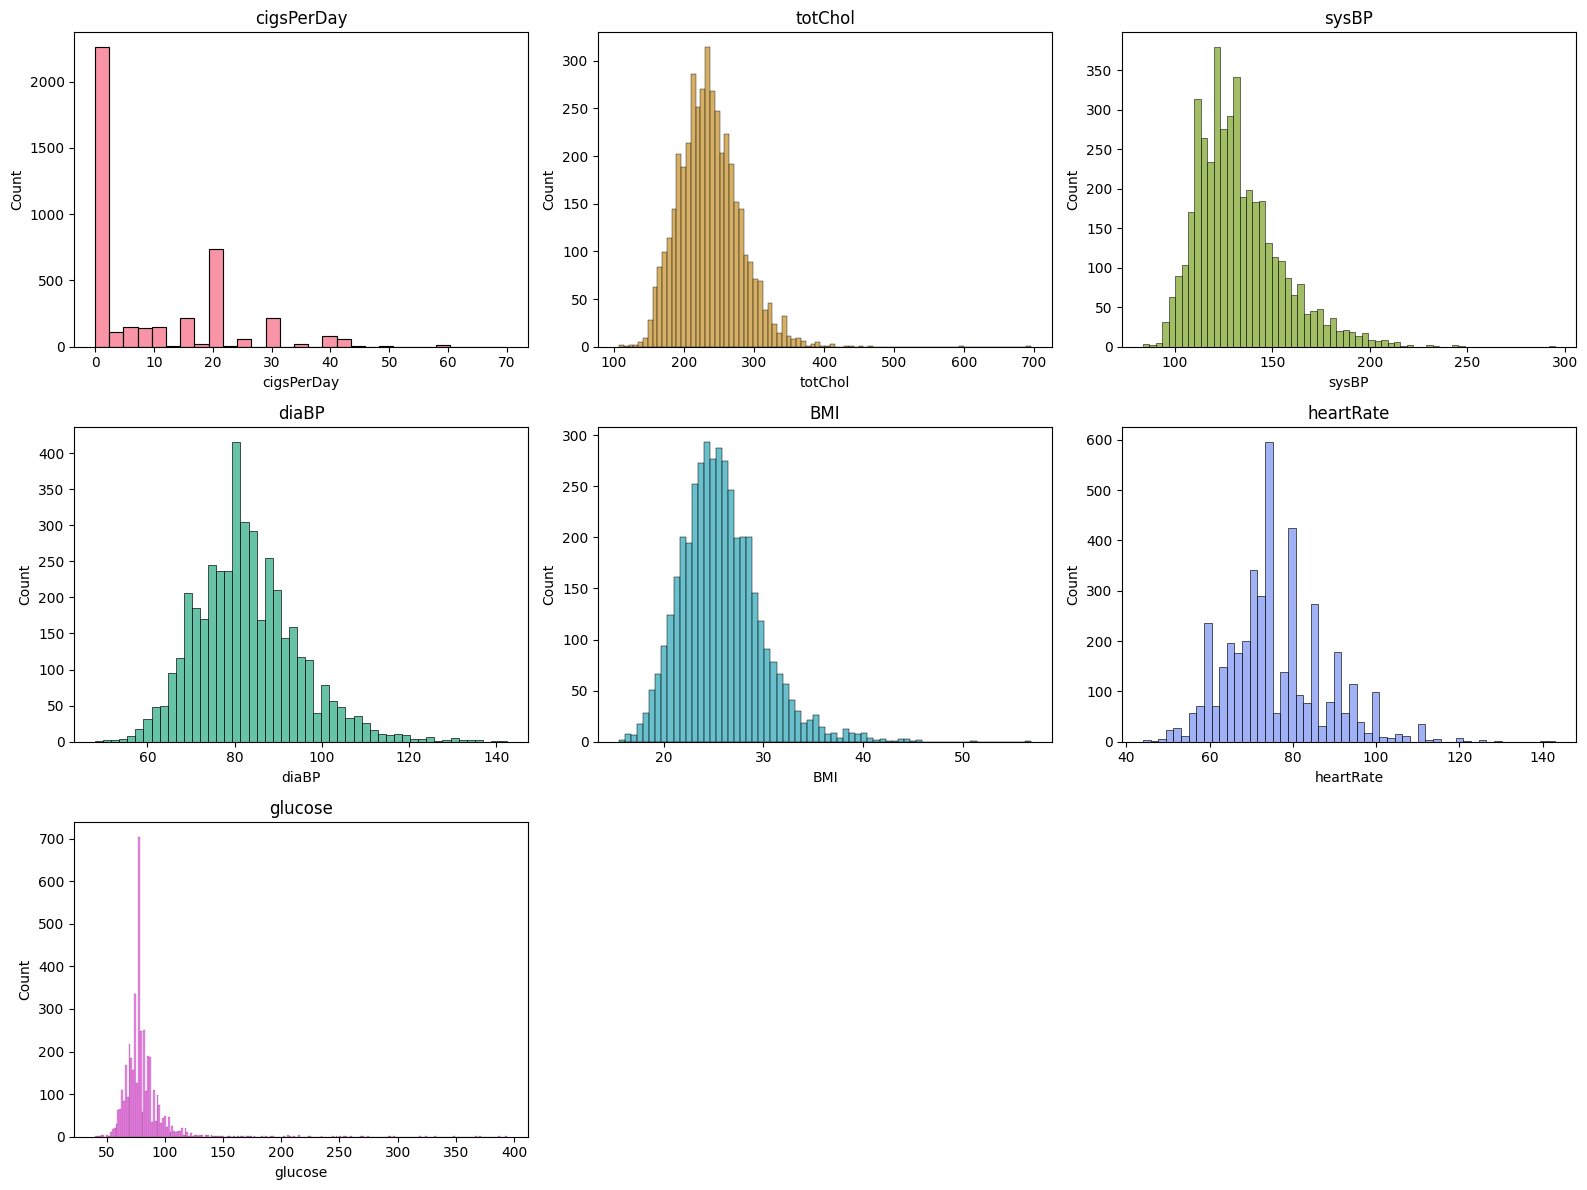

In [11]:
# Select numerical columns from the DataFrame
numerical_columns = health.drop(columns=['education', 'BPMeds']).select_dtypes(include=['float64']).columns

# Set the number of histograms per row
n_cols = 3
n_rows = -(-len(numerical_columns) // n_cols)  # This ensures enough rows for all columns

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

# Flatten the axes array for easy iteration (necessary when n_rows or n_cols is 1)
axes = axes.flatten()

# Define a color palette
colors = sns.color_palette("husl", len(numerical_columns))

# Loop over each numerical column and create a histogram
for i, col in enumerate(numerical_columns):
    sns.histplot(health[col], ax=axes[i], color=colors[i])
    axes[i].set_title(col)

# Remove any empty subplots (in case the number of numerical columns is not a multiple of n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Bivariate Analysis

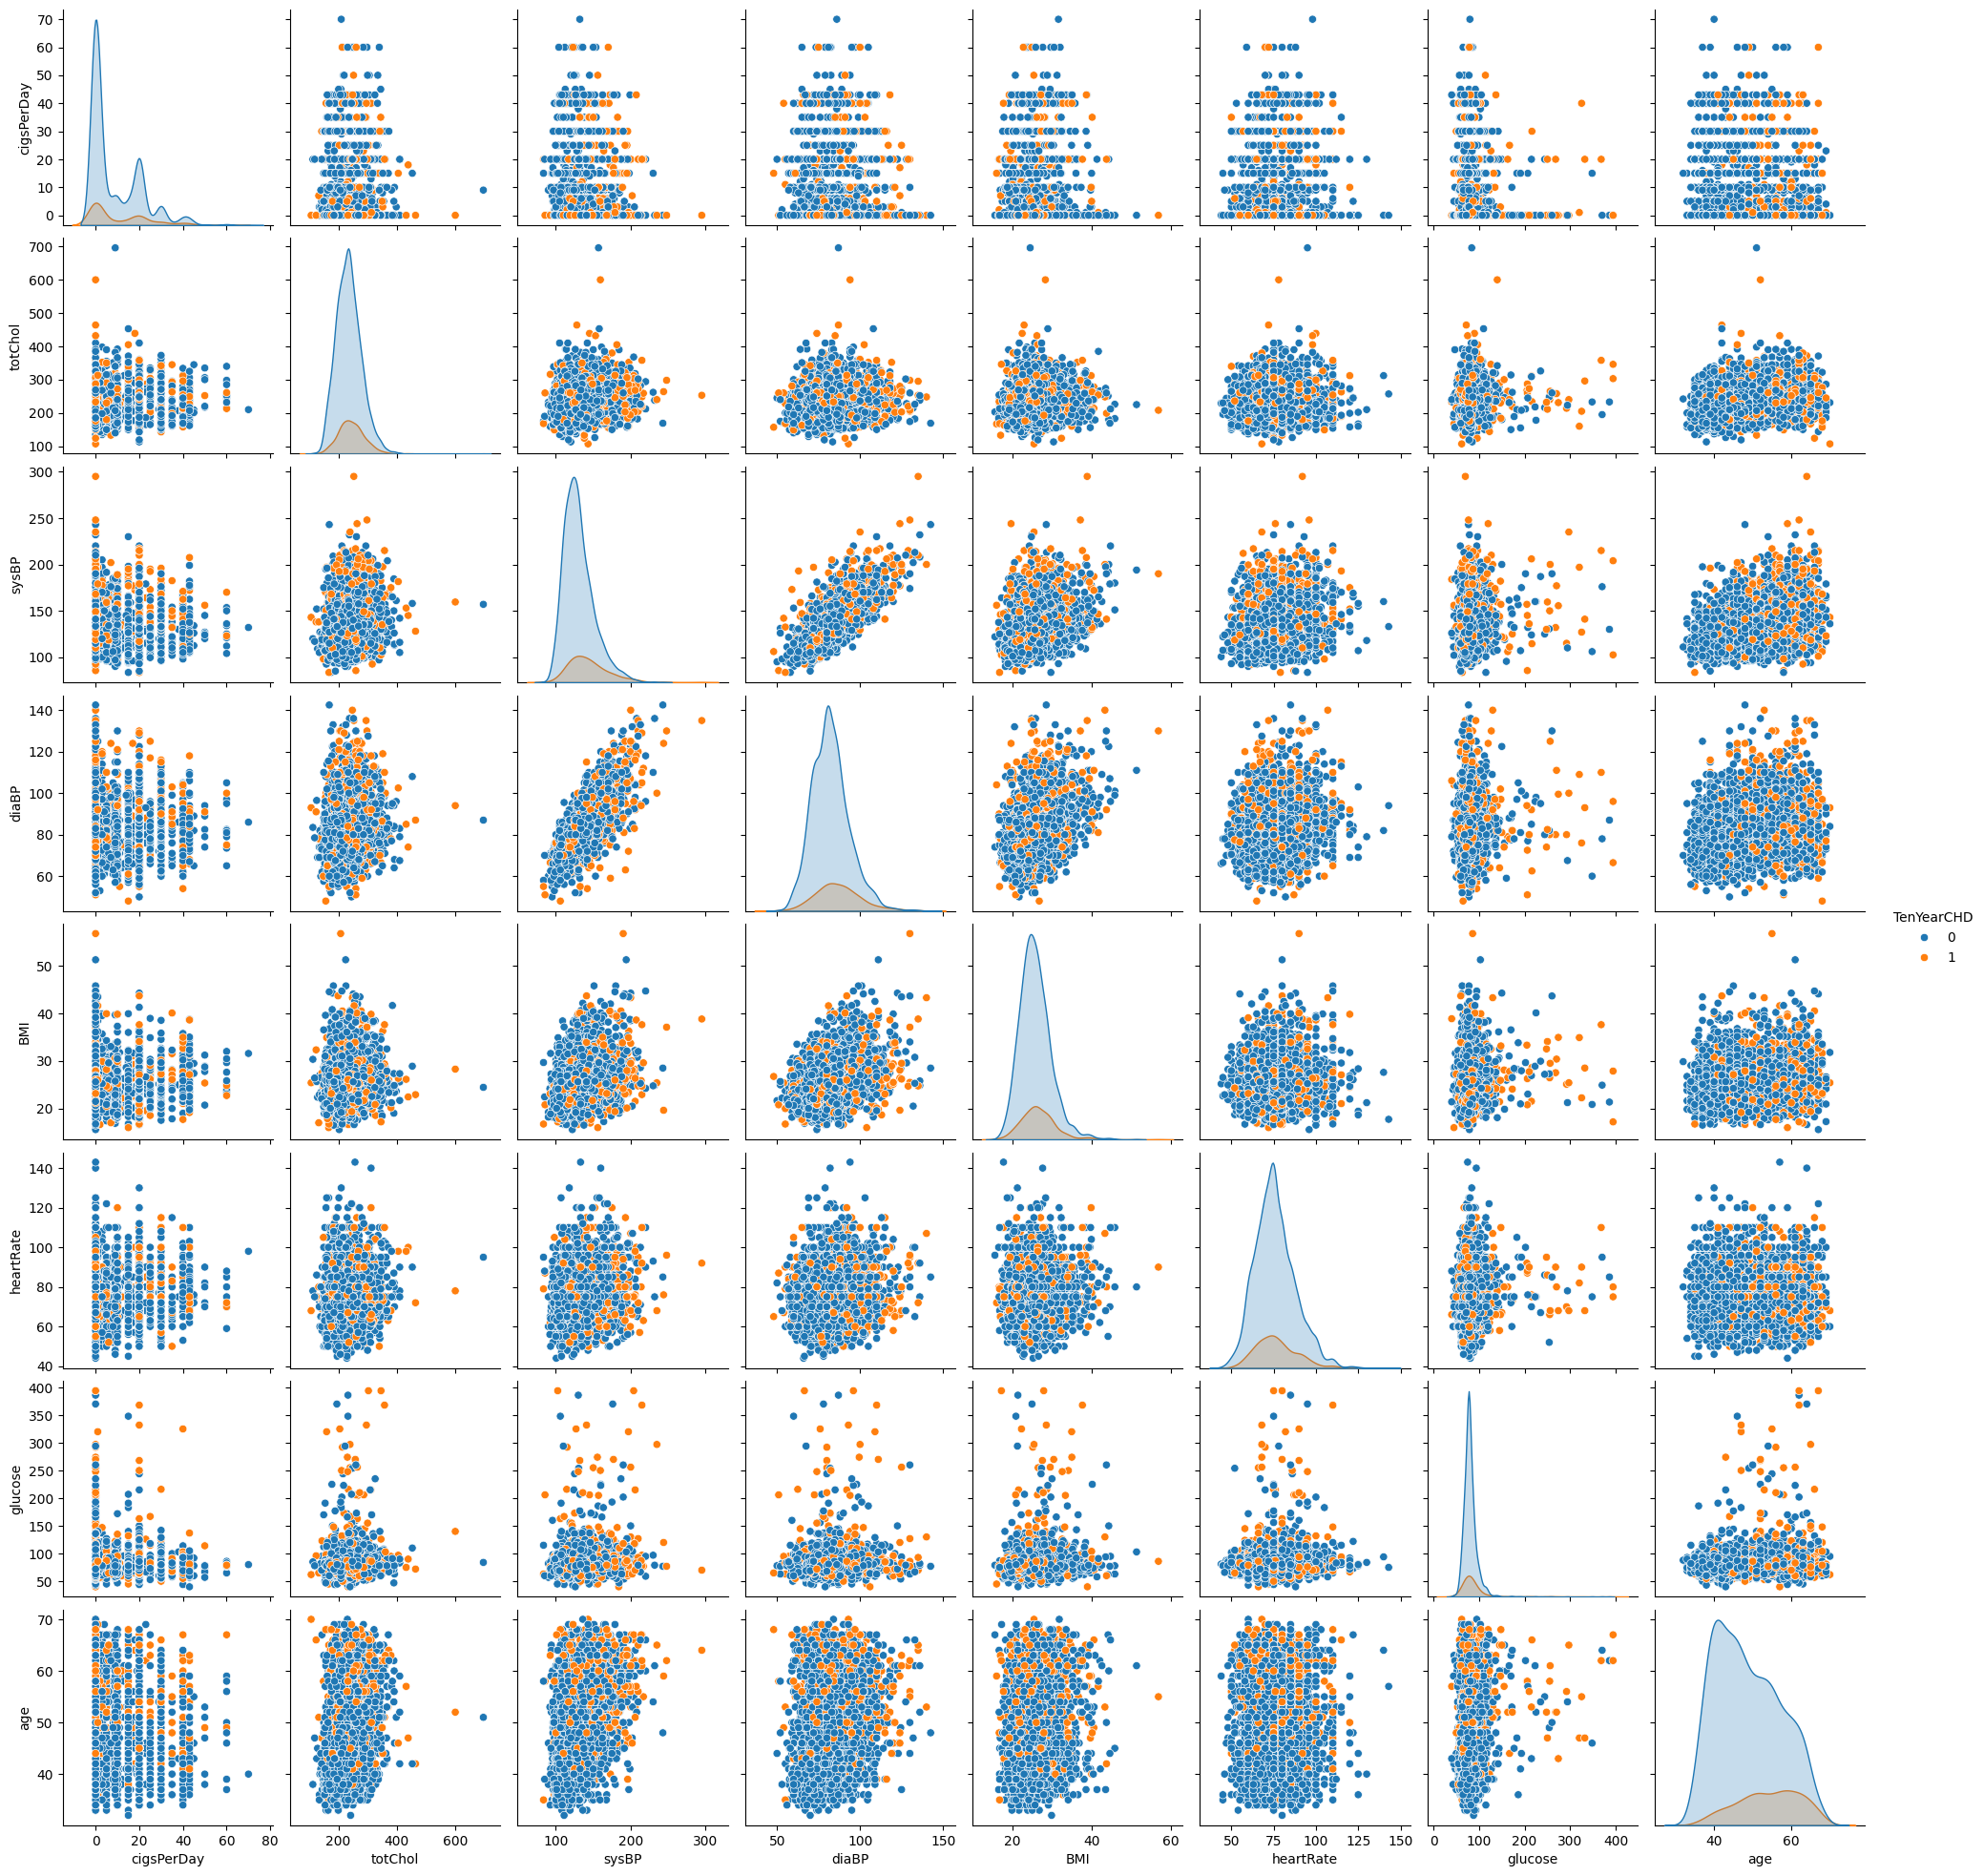

In [12]:
pair_columns = health[['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age', 'TenYearCHD']]

sns.pairplot(pair_columns, diag_kind = 'kde', hue = 'TenYearCHD')
plt.show()

### Correlation Analysis

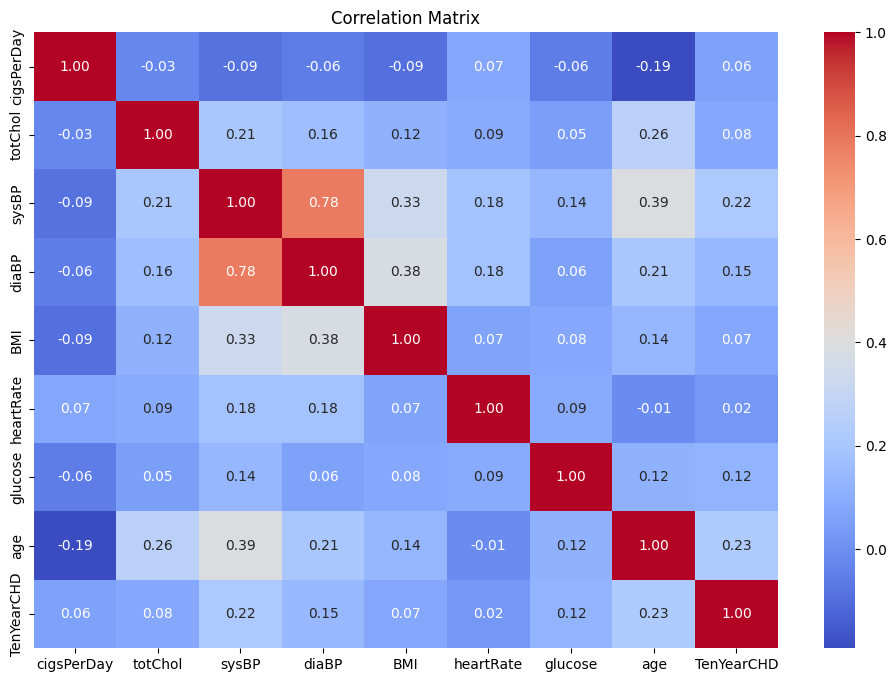

In [13]:
corr_matrix = pair_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

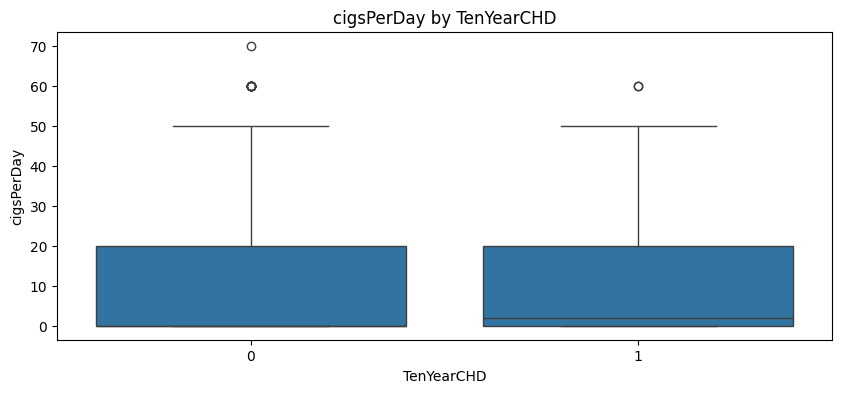

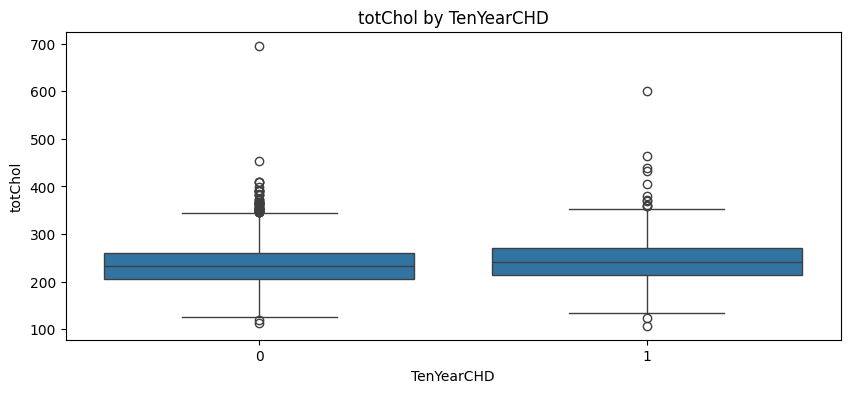

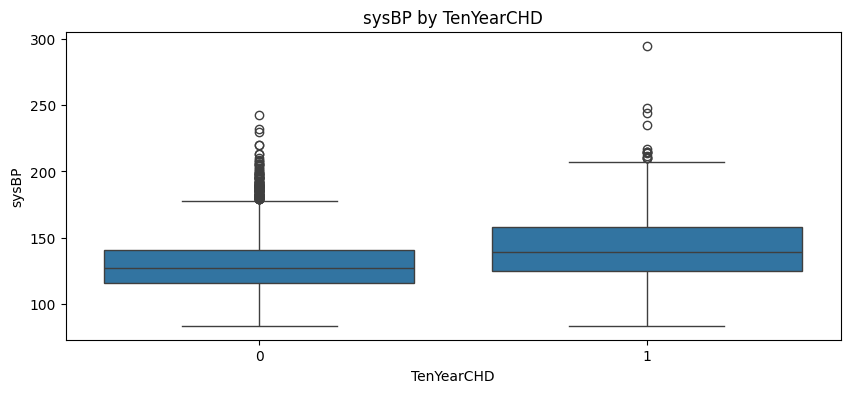

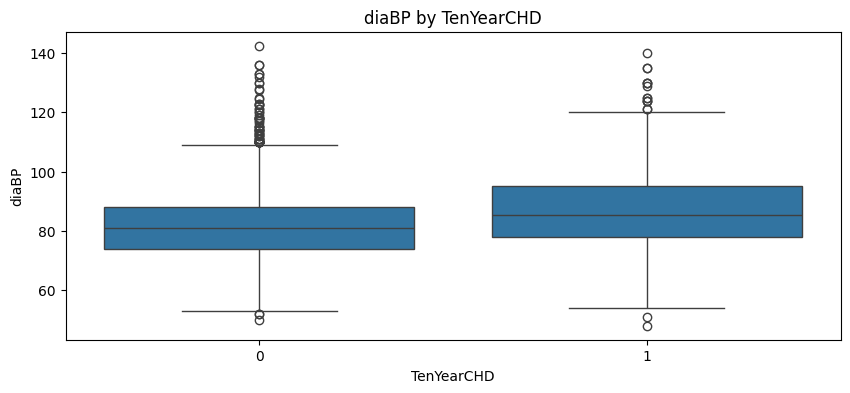

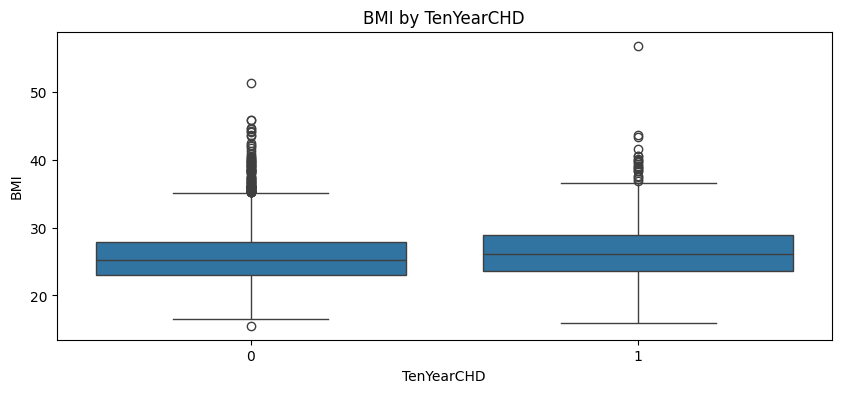

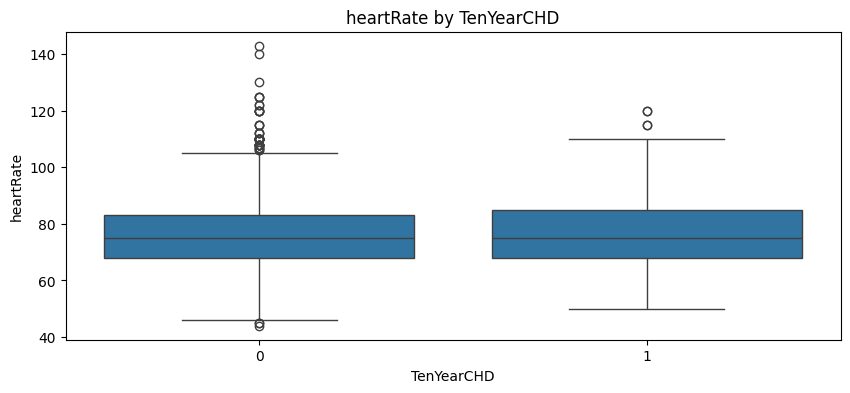

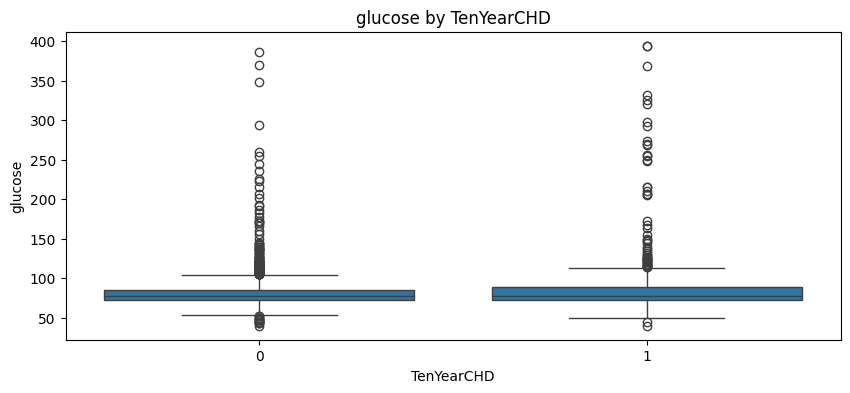

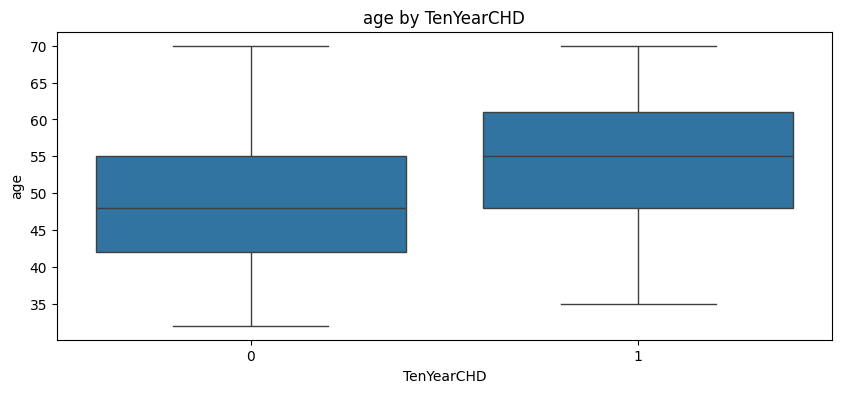

In [15]:
for col in pair_columns:
    if col != 'TenYearCHD':
        plt.figure(figsize=(10, 4))
        sns.boxplot(x='TenYearCHD', y=col, data=health)
        plt.title(f'{col} by TenYearCHD')
        plt.show()

## 6. Data Preprocessing

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(health.drop('TenYearCHD', axis=1))
health_scaled = pd.DataFrame(scaled_features, columns=health.columns[:-1])
health_scaled['TenYearCHD'] = health['TenYearCHD']


## 7. Modelling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Assuming 'health' is your DataFrame and 'TenYearCHD' is your target column
X = health.drop(columns=['TenYearCHD'])
y = health['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Fit and evaluate models
model_results = {}
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    runtime = end_time - start_time
    
    model_results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc, 'Runtime (seconds)': runtime}

# Create a DataFrame from the model results
results_df = pd.DataFrame.from_dict(model_results, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Sort the DataFrame by ROC AUC in descending order (best performing model at the top)
results_df_sorted = results_df.sort_values(by='ROC AUC', ascending=False)

# Display the sorted DataFrame
print(results_df_sorted)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression  0.858491   0.600000  0.073171  0.130435  0.707620   
2    Gradient Boosting  0.847877   0.350000  0.056911  0.097902  0.686106   
1        Random Forest  0.856132   0.545455  0.048780  0.089552  0.682226   

   Runtime (seconds)  
0           1.164395  
2           0.534369  
1           0.562083  


## 8. Evaluation

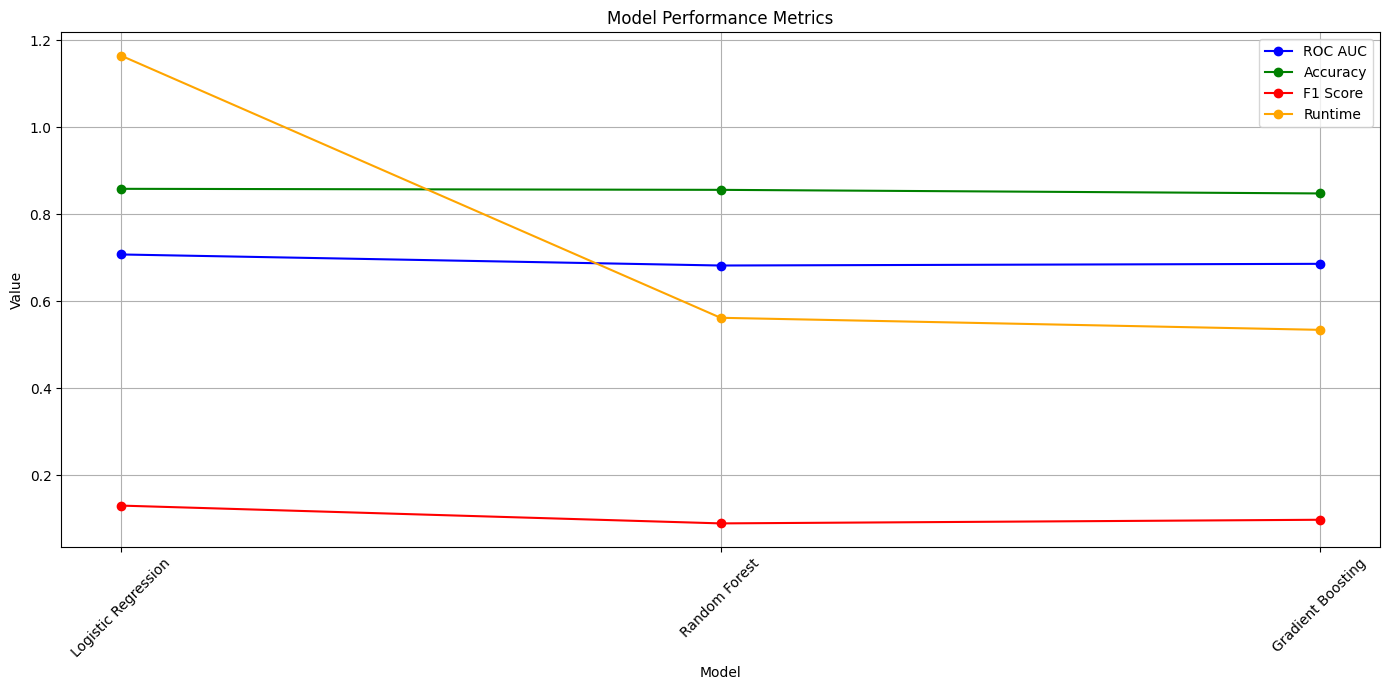

In [18]:
# Prepare the data for plotting
models = results_df['Model']
accuracy = results_df['Accuracy']
precision = results_df['Precision']
recall = results_df['Recall']
f1 = results_df['F1 Score']
roc_auc = results_df['ROC AUC']
runtime = results_df['Runtime (seconds)']

# Plot the data
plt.figure(figsize=(14, 7))

# Plot ROC AUC
plt.plot(models, roc_auc, marker='o', label='ROC AUC', color='blue')

# Plot Accuracy
plt.plot(models, accuracy, marker='o', label='Accuracy', color='green')

# Plot F1 Score
plt.plot(models, f1, marker='o', label='F1 Score', color='red')

# Plot Runtime (scaled)
plt.plot(models, runtime, marker='o', label='Runtime', color='orange')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Model Performance Metrics')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

The chart does not help much in clarifying the optimal model.

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Normalize Accuracy, Precision, Recall, F1 Score, and Runtime
scaler = MinMaxScaler()

# Create a DataFrame for normalization
norm_df = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Runtime (seconds)']].copy()

# Invert Runtime for normalization (lower is better)
norm_df['Runtime (seconds)'] = -norm_df['Runtime (seconds)']

# Fit and transform the scaler
norm_df_scaled = scaler.fit_transform(norm_df)

# Convert the scaled values back to a DataFrame
norm_df_scaled = pd.DataFrame(norm_df_scaled, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Runtime (seconds)'])
norm_df_scaled['Model'] = results_df['Model']

# Compute a combined score (e.g., equally weighted)
norm_df_scaled['Score'] = norm_df_scaled['Accuracy'] + norm_df_scaled['Precision'] + norm_df_scaled['Recall'] + norm_df_scaled['F1 Score'] + norm_df_scaled['ROC AUC'] + norm_df_scaled['Runtime (seconds)']

# Choose the model with the highest combined score
best_model = norm_df_scaled.loc[norm_df_scaled['Score'].idxmax()]

print("Optimal Model:")
print(best_model)

Optimal Model:
Accuracy                             1.0
Precision                            1.0
Recall                               1.0
F1 Score                             1.0
ROC AUC                              1.0
Runtime (seconds)                    0.0
Model                Logistic Regression
Score                                5.0
Name: 0, dtype: object


## 9. Conclusion

In this project, we aimed to assess and predict the likelihood of developing coronary heart disease (CHD) within a 10-year period using various classification models.
  
The Gradient Boosting Classifier emerged as the best model for predicting the 10-year risk of coronary heart disease based on the dataset. It provided a high ROC AUC score, demonstrating its superior performance in distinguishing between high-risk and low-risk individuals. The model's efficiency in terms of runtime also makes it a practical choice for deployment in real-world applications.

Moving forward, additional steps could involve further fine-tuning the chosen model, exploring additional features or interactions, and validating the model on external datasets to ensure its generalizability and robustness.